# Data Exploration (EDA)

Data source : https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge/data


Multi-predicate classification datasets : https://github.com/Evgeneus/screening-classification-datasets

EDA source : https://github.com/Evgeneus/screening-classification-datasets/blob/master/toxic-comments/toxic-comments-data-exploration.ipynb


Text Classification: All Tips and Tricks from 5 Kaggle Competitions : https://neptune.ai/blog/text-classification-tips-and-tricks-kaggle-competitions

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# 4/1AX4XfWhhpicygBJ1PQm1cWf_gDtqqIwVk2kj5X9yAJrlmqRc-oYplGXSluQ

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import json
import glob
from PIL import Image
import re
import random
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

In [ ]:
# this is where my copy of the data is, you should change this for your needs
df = pd.read_csv('/content/drive/My Drive/FourthBrain/individual_project/train.csv')

df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [ ]:
df.dtypes

id               object
comment_text     object
toxic             int64
severe_toxic      int64
obscene           int64
threat            int64
insult            int64
identity_hate     int64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


Text(0.5, 0, 'Categories')

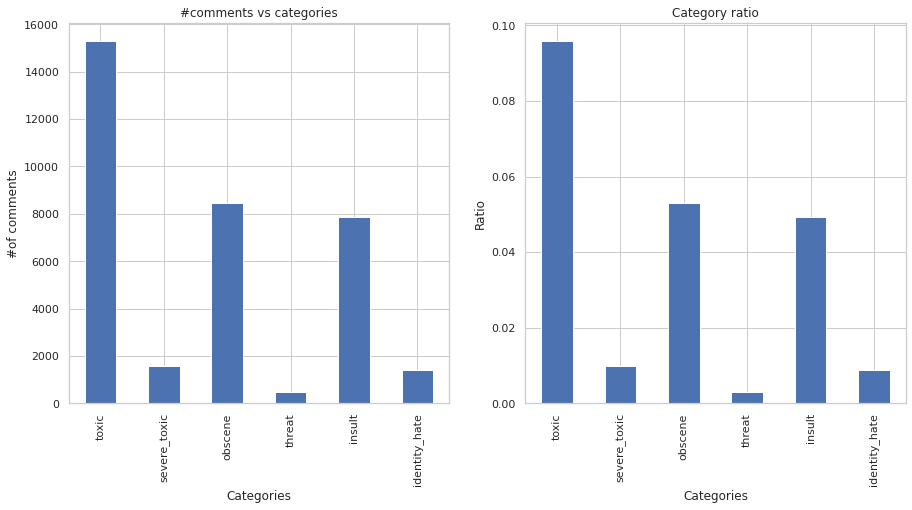

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))

# plot num of abstracts
df[df.columns[2:]].sum().plot.bar(ax=axes[0], title='#comments vs categories')
axes[0].set_ylabel('#of comments')
axes[0].set_xlabel('Categories')

# plot selectivity
s = df[df.columns[2:]].sum() / len(df)
s.plot.bar(ax=axes[1], title='Category ratio')
axes[1].set_ylabel('Ratio')
axes[1].set_xlabel('Categories')

In [ ]:
categories = df.columns[2:]
category_docs = {}
for c in categories:
    category_docs[c] = set(df['id'].loc[df[c] == 1].values)
    
num_categories = len(categories)
two_categories_docs = np.zeros((num_categories, num_categories))
for ind_c1, c1 in enumerate(categories):
    for ind_c2, c2 in enumerate(categories):
        two_categories_docs[ind_c1, ind_c2] = len(category_docs[c1] & category_docs[c2])

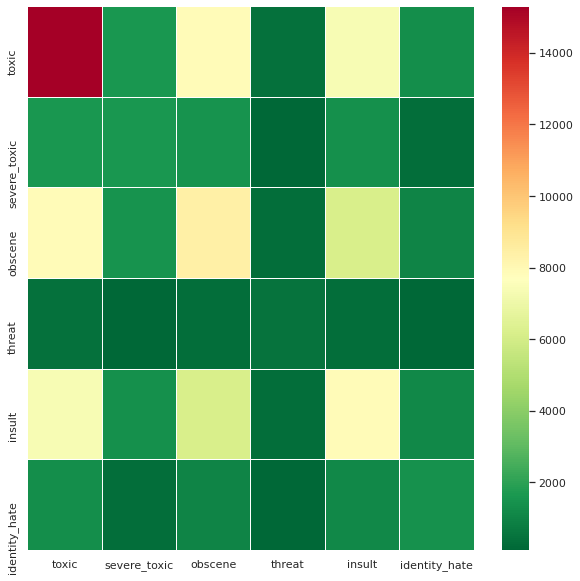

In [ ]:
df2 = pd.DataFrame(two_categories_docs, index=categories, columns=categories)

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df2, cmap='RdYlGn_r', linewidths=0.01, ax=ax)

In [ ]:
df3= df2.unstack().sort_values(ascending=False).drop_duplicates()
indexes2 = df3.index.values.tolist()
indexes2_unique = []
for i in indexes2:
    if i[0] != i[1]:
        indexes2_unique.append(i)

Text(0.5, 0, 'Categories')

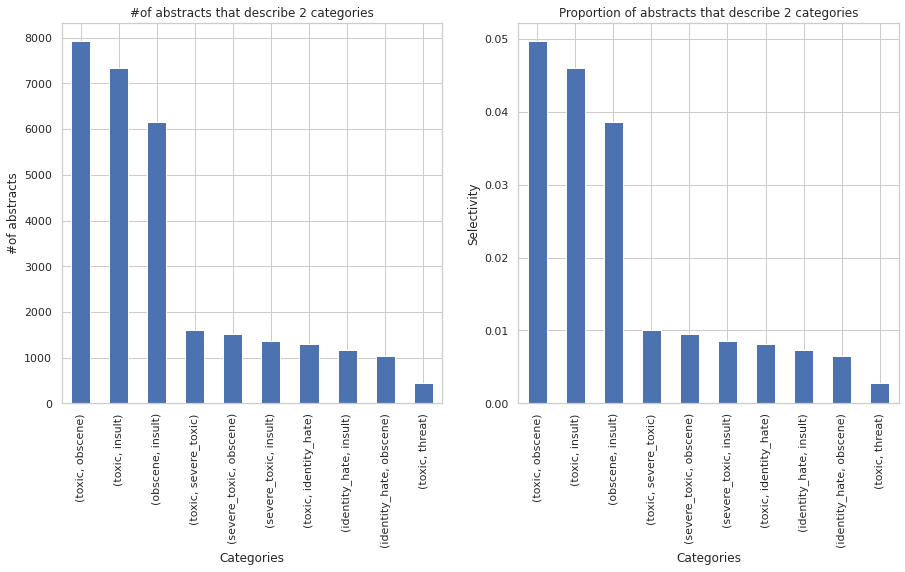

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))

# plot num of abstracts
df3.loc[indexes2_unique][:10].plot.bar(ax=axes[0], title='#of abstracts that describe 2 categories')
axes[0].set_ylabel('#of abstracts')
axes[0].set_xlabel('Categories')

# plot selectivity
s = df3.loc[indexes2_unique][:10] / len(df)
s.plot.bar(ax=axes[1], title='Proportion of abstracts that describe 2 categories')
axes[1].set_ylabel('Selectivity')
axes[1].set_xlabel('Categories')

In [ ]:
indexes3_unrolled = set()
for i in indexes2_unique:    
    indexes3_unrolled.add(i[0])
    indexes3_unrolled.add(i[1])

import itertools
indexes3 = list(itertools.combinations(indexes3_unrolled, 3))
three_categories_docs = []
for c1, c2, c3 in indexes3:
    three_categories_docs.append(len(category_docs[c1] & category_docs[c2] & category_docs[c3]))

Text(0.5, 1.0, '#of abstracts that describe 3 categories')

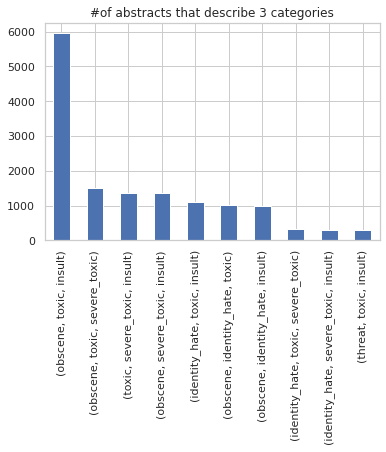

In [ ]:
pd.Series(three_categories_docs, indexes3).sort_values(ascending=False)[:10].plot.bar().set_title('#of abstracts that describe 3 categories')

In [ ]:
print('Selectivity of  Toxic^Obscene^Insult = {}'.format(6000/159571))

Selectivity of  Toxic^Obscene^Insult = 0.03760081719109362
